In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from matplotlib import style
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(r"C:\Users\avanm\OneDrive\Desktop\ML_Spring2019\Dataset\Dataset\Training\Features_Variant_3.csv", header = None,index_col= False,
                 names=["Likes","Checkin","PageTheme","PageCategory","Derived5","Derived6","Derived7","Derived8","Derived9","Derived10",
                       "Derived11","Derived12","Derived13","Derived14","Derived15","Derived16","Derived17","Derived18","Derived19",
                       "Derived20","Derived21","Derived22","Derived23","Derived24","Derived25","Derived26","Derived27","Derived28","Derived29",
                       "CC1","CC2","CC3","CC4","CC5","BaseTime","PostLength","PostShareCount","PostPromoStatus","HLocal","PostPublishSun",
                        "PostPublishedMon","PostPublishedTue","PostPublishedWed","PostPublishedThu","PostPublishedFri","PostPublishedSat",
                       "BaseDateTimeSun","BaseDateTimeMon","BaseDateTimeTue","BaseDateTimeWed","BaseDateTimeThu","BaseDateTimeFri","BaseDateTimeSat"
                       ,"Target"])

In [3]:
# classifying the target variable
np.mean(df.loc[:,'Target'])

7.103668103519464

In [7]:
freq = df['Target'].value_counts()

In [8]:
freq_sorted = freq.sort_index(axis = 0, ascending = True)

In [9]:
freq_sorted

0       66888
1       15451
2        7696
3        4741
4        3317
5        2503
6        1952
7        1611
8        1309
9        1088
10        908
11        831
12        728
13        592
14        585
15        504
16        463
17        434
18        366
19        387
20        363
21        338
22        335
23        278
24        250
25        228
26        224
27        231
28        203
29        175
        ...  
731         1
741         1
752         1
753         1
758         1
759         1
762         1
768         1
779         1
831         1
849         1
851         1
853         1
869         1
909         1
914         2
918         1
933         1
960         1
1017        1
1044        2
1054        1
1134        1
1144        1
1152        1
1161        1
1235        1
1378        1
1497        1
1816        1
Name: Target, Length: 510, dtype: int64

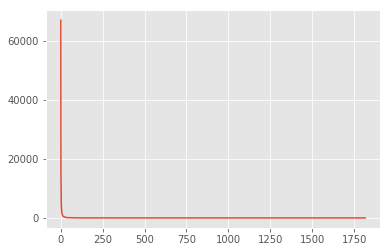

In [9]:
plt.figure()
plt.plot(freq_sorted)
plt.yticks([0,20000,40000,60000])
plt.show()

# as can be seen that most of the values are closer to 0-50 hrs. There is high chance of getting a post comment between that period
# we will classify it as >0 positive class and =0 as negative class

In [4]:
# stored in a new variable
df_class = df.copy(deep=True)

In [5]:
# Classifying anything greater than 0 as class positive and less than as class negative
df_class['TargetClass'] = np.where(df['Target'] > 0 , 1, 0)

In [6]:
# Dropping the original Target variable
df_class.drop(['Target'], axis = 1)

,Likes,Checkin,PageTheme,PageCategory,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,PostPublishedFri,PostPublishedSat,BaseDateTimeSun,BaseDateTimeMon,BaseDateTimeTue,BaseDateTimeWed,BaseDateTimeThu,BaseDateTimeFri,BaseDateTimeSat,TargetClass
0,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,1,0,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,1,0,0,0,0
5,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,1,0,0,0,0,0
6,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,1,0,0,0
7,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,1,0,0,0,0,0,0,0
8,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,0,0,0,0,0,1,0,0
9,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,0,1,0,0,0,0,0,0


In [7]:
list(df_class)

['Likes',
 'Checkin',
 'PageTheme',
 'PageCategory',
 'Derived5',
 'Derived6',
 'Derived7',
 'Derived8',
 'Derived9',
 'Derived10',
 'Derived11',
 'Derived12',
 'Derived13',
 'Derived14',
 'Derived15',
 'Derived16',
 'Derived17',
 'Derived18',
 'Derived19',
 'Derived20',
 'Derived21',
 'Derived22',
 'Derived23',
 'Derived24',
 'Derived25',
 'Derived26',
 'Derived27',
 'Derived28',
 'Derived29',
 'CC1',
 'CC2',
 'CC3',
 'CC4',
 'CC5',
 'BaseTime',
 'PostLength',
 'PostShareCount',
 'PostPromoStatus',
 'HLocal',
 'PostPublishSun',
 'PostPublishedMon',
 'PostPublishedTue',
 'PostPublishedWed',
 'PostPublishedThu',
 'PostPublishedFri',
 'PostPublishedSat',
 'BaseDateTimeSun',
 'BaseDateTimeMon',
 'BaseDateTimeTue',
 'BaseDateTimeWed',
 'BaseDateTimeThu',
 'BaseDateTimeFri',
 'BaseDateTimeSat',
 'Target',
 'TargetClass']

In [8]:
# Splitting the data into X
#X = df_class.loc[:,'Likes':'BaseDateTimeSat']
# Selecting 17 features from previous findings

X = df_class.loc[:,['Likes','Checkin','PageTheme','CC1','CC2','CC3','CC4','PostLength','PostShareCount','HLocal','PostPublishSun',
                    'PostPublishedMon','PostPublishedTue','PostPublishedWed','PostPublishedThu','PostPublishedFri','PostPublishedSat',]]
X.head()

,Likes,Checkin,PageTheme,CC1,CC2,CC3,CC4,PostLength,PostShareCount,HLocal,PostPublishSun,PostPublishedMon,PostPublishedTue,PostPublishedWed,PostPublishedThu,PostPublishedFri,PostPublishedSat
0,634995,0,463,0,0,0,0,166,2,24,0,0,0,1,0,0,0
1,634995,0,463,0,0,0,0,132,1,24,0,0,0,0,1,0,0
2,634995,0,463,0,0,0,0,133,2,24,0,0,0,0,0,1,0
3,634995,0,463,7,1,6,7,131,1,24,0,0,0,0,0,1,0
4,634995,0,463,1,0,1,1,142,5,24,0,1,0,0,0,0,0


In [9]:
# Splitting the data into y
y = df_class.loc[:,'TargetClass']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TargetClass, dtype: int32

In [10]:
# Splitting data into train and test using sklearn split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11, test_size = 0.3)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(84768, 17)
(84768,)
(36330, 17)
(36330,)


In [ ]:
# PostPromotionStatus(38) and PostCategory(4) are two features which are categorical which needs to be handled. Then there are
# more from columns PostPublishedMon : BaseDateTimeSun (14 but they are one hot encoded)

In [ ]:
## Questions: Does the manual encoded categorical variables need one hot encoding ? and should they be normalized along with
# continuous features?

In [12]:
df.shape

(121098, 54)

In [13]:
# Creating copy of the train and test variables to scale them
scaled_X_train = X_train.copy(deep=True)
scaled_X_test = X_test.copy(deep=True)

In [14]:
## Since other columns are already one-hot encoded, there was no need to perform scaling on them
scaler = preprocessing.StandardScaler()
scaled_X_train[['Likes','Checkin','PageTheme','CC1','CC2','CC3','CC4',
                'PostLength','PostShareCount','HLocal',]] = scaler.fit_transform(scaled_X_train[['Likes','Checkin','PageTheme',
                                                                                               'CC1','CC2','CC3','CC4','PostLength','PostShareCount',
                                                                                               'HLocal']])

In [15]:
# scaling X_test with the X_train parameters
scaled_X_test[['Likes','Checkin','PageTheme','CC1','CC2','CC3','CC4',
                'PostLength','PostShareCount','HLocal']] = scaler.transform(scaled_X_test[['Likes','Checkin','PageTheme','CC1','CC2','CC3','CC4',
                'PostLength','PostShareCount','HLocal']])

KeyError: 'Derived6'

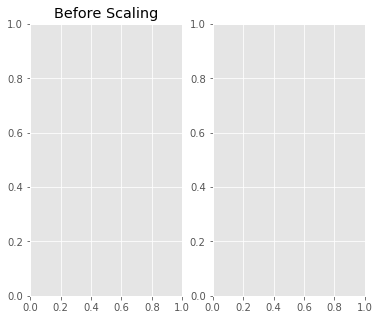

In [90]:
# # Plot and visualize scaling difference
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
# ax1.set_title('Before Scaling')
# sns.kdeplot(X_train['Derived6'], ax=ax1)
# sns.kdeplot(X_train['Derived7'], ax=ax1)
# sns.kdeplot(X_train['Derived9'], ax=ax1)

# ax2.set_title('After Standard Scaler')
# sns.kdeplot(scaled_X_train['Derived6'], ax=ax2)
# sns.kdeplot(scaled_X_train['Derived7'], ax=ax2)
# sns.kdeplot(scaled_X_train['Derived9'], ax=ax2)


# plt.show()

In [ ]:
#***********************************************************SVM Models*******************************************************#

In [21]:
def print_score1(classifier,X_train,y_train,X_test,y_test,train=True):
    mean_train_acc = 0
    mean_valid_acc = 0
    test_acc = 0
    res = 0
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_validate(classifier, X_train, y_train, cv=3, n_jobs=-1, scoring='accuracy', return_train_score=True)
        mean_train_acc = res['train_score'].mean()
        mean_valid_acc = res['test_score'].mean()
        print('Average Accuracy for Train data:\t{0:.4f}\n'.format(res['train_score'].mean()))
        print('Average Accuracy for Validation data :\t{0:.4f}'.format(res['test_score'].mean()))
    elif train == False:
        print("\n\nTest results:\n")
        test_acc = accuracy_score(y_test,classifier.predict(X_test))
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
    return mean_train_acc, mean_valid_acc, test_acc, res

In [28]:
# Create SVM Classifier
clf = SVC(kernel='linear', C= 1)
# Train the model using the training sets
# Takes approximately 10-15 min to execute
clf.fit(scaled_X_train, y_train)
# takes around a minute to execute
y_pred = clf.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


[[18912  1325]
 [ 5925 10168]]
             precision    recall  f1-score   support

          0       0.76      0.93      0.84     20237
          1       0.88      0.63      0.74     16093

avg / total       0.82      0.80      0.79     36330

Accuracy: 0.8004404073768235


In [32]:
model1_acc = metrics.accuracy_score(y_test, y_pred)
model1_confusion = confusion_matrix(y_test,y_pred)

In [34]:
print(model1_acc)
print(model1_confusion)

0.8004404073768235
[[18912  1325]
 [ 5925 10168]]


In [35]:
# Create SVM Classifier
clf = SVC(kernel='linear', C= 0.0001)
# Train the model using the training sets
# Takes approximately 10-15 min to execute
clf.fit(scaled_X_train, y_train)
# takes around a minute to execute
y_pred = clf.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[19519   718]
 [10565  5528]]
             precision    recall  f1-score   support

          0       0.65      0.96      0.78     20237
          1       0.89      0.34      0.49     16093

avg / total       0.75      0.69      0.65     36330

Accuracy: 0.6894302229562345


In [36]:
model2_acc = metrics.accuracy_score(y_test, y_pred)
model2_confusion = confusion_matrix(y_test,y_pred) 

In [37]:
print(model2_acc)
print(model2_confusion)

0.6894302229562345
[[19519   718]
 [10565  5528]]


In [38]:
# Create SVM Classifier
clf = SVC(kernel='linear', C= 0.1)
# Train the model using the training sets
# Takes approximately 10-15 min to execute
clf.fit(scaled_X_train, y_train)
# takes around a minute to execute
y_pred = clf.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[18958  1279]
 [ 6021 10072]]
             precision    recall  f1-score   support

          0       0.76      0.94      0.84     20237
          1       0.89      0.63      0.73     16093

avg / total       0.82      0.80      0.79     36330

Accuracy: 0.7990641343242499


In [39]:
model3_acc = metrics.accuracy_score(y_test, y_pred)
model3_confusion = confusion_matrix(y_test,y_pred) 

In [40]:
print(model3_acc)
print(model3_confusion)

0.7990641343242499
[[18958  1279]
 [ 6021 10072]]


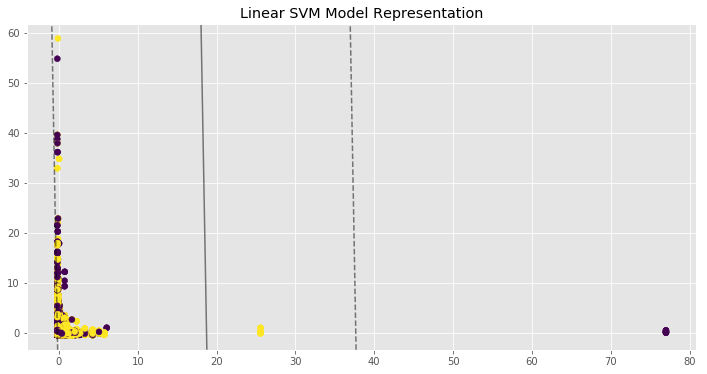

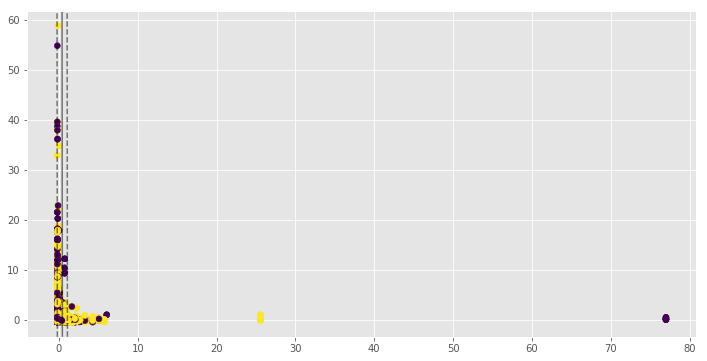

In [44]:
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

X_sub = scaled_X_train.iloc[:, [0,7]].values
y_sub = y_train.values
plt.title('Linear SVM Model Representation')
# A function to draw hyperplane and the margin of SVM classifier
def draw_svm(X, y, C):
    # Plotting the Points
    plt.scatter(X[:,0], X[:,1], c=y)
    
    # The SVM Model with given C parameter
    clf1 = SVC(kernel='linear', C=C)
    clf1.fit(X, y)
    
    # Limit of the axes
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Creating the meshgrid
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf1.decision_function(xy).reshape(XX.shape)
    
    # Plotting the boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf1.support_vectors_[:, 0], 
                clf1.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    # Returns the classifier
    return clf1

clf_arr = []
clf_arr.append(draw_svm(X_sub, y_sub, 0.00001))
clf_arr.append(draw_svm(X_sub, y_sub, 0.001))

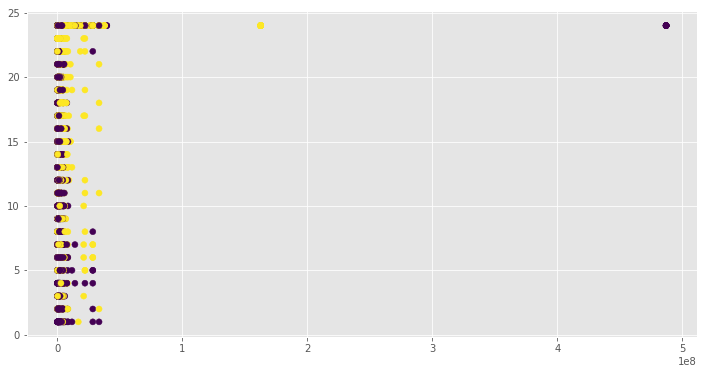

In [48]:
plt.figure()

plt.scatter(X_train.loc[:,'Likes'].values, X_train.loc[:,'HLocal'].values, c=y_train.values)

In [22]:
# Cross validation using SVM
def poly_svm(X_train, y_train, C):
    cross_sv = SVC(kernel='poly', degree=C)
    scores = cross_validate(cross_sv, X_train, y_train,cv=3, return_train_score=True)
    return scores

P_score1 = poly_svm(scaled_X_train, y_train, 2)
print(np.mean(P_score1['train_score']))
print(np.mean(P_score1['test_score']))
P_score2 = poly_svm(scaled_X_train, y_train, 3)
print(np.mean(P_score2['train_score']))
print(np.mean(P_score2['test_score']))
P_score3 = poly_svm(scaled_X_train, y_train, 4)
print(np.mean(P_score3['train_score']))
print(np.mean(P_score3['test_score']))

0.6855357961314353
0.683465498480221
0.6342723693595212
0.6310990306265633


In [61]:
print(np.mean(P_score1['test_score']))
print(np.mean(P_score2['test_score']))
print(np.mean(P_score2['test_score']))

0.7358437114664017
0.683465498480221
0.683465498480221


In [56]:
total_train_acc = []
total_train_acc.append(np.mean(P_score1['train_score']))
total_train_acc.append(np.mean(P_score2['train_score']))
total_train_acc.append(np.mean(P_score3['train_score']))
print(total_train_acc)

total_test_acc = []
total_test_acc.append(np.mean(P_score1['test_score']))
total_test_acc.append(np.mean(P_score2['test_score']))
total_test_acc.append(np.mean(P_score3['test_score']))
print(total_test_acc)


[0.7368641382341377, 0.6855357961314353, 0.6342723693595212]
[0.7358437114664017, 0.683465498480221, 0.6310990306265633]


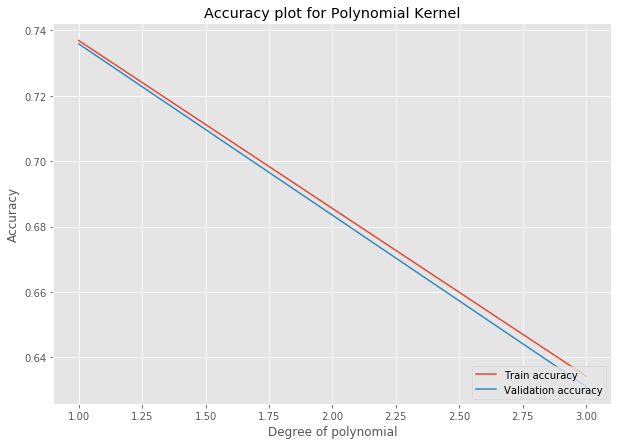

In [60]:
plt.figure(figsize=(10,7))
plt.title('Accuracy plot for Polynomial Kernel')
plt.xlabel('Degree of polynomial')
plt.ylabel('Accuracy')
c = [1,2,3]
plt.plot(c,total_train_acc, label='Train accuracy')
plt.plot(c,total_test_acc,label = 'Validation accuracy')
plt.legend(loc='lower right')
plt.savefig('Dataset1_AccuracyPlotforPoly.png')


In [62]:
# Polynomial kernel
poly_clf = SVC(kernel='poly', degree = 2)
poly_clf.fit(scaled_X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
y_pred_1 = poly_clf.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred_1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_1))

[[19350   887]
 [ 8148  7945]]
Accuracy: 0.7513074593999449


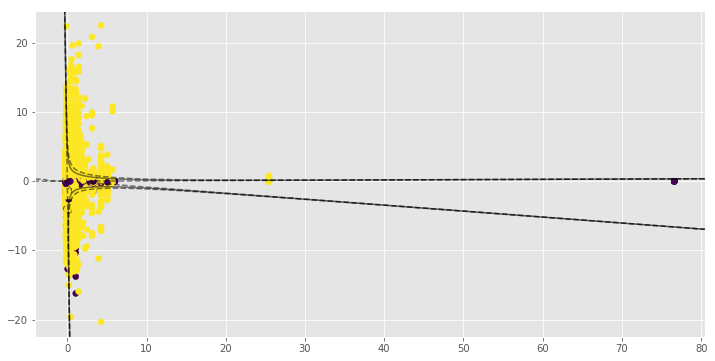

In [51]:
## POLY PLOT
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

X_sub1 = scaled_X_train.iloc[:, [0,33]].values
y_sub1 = y_train.values

def draw_svm1(X, y, C=1.0):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='poly', C=C)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

poly_clf1 = draw_svm1(X_sub1, y_sub1)

In [64]:
# Cross validation using SVM
def sig_svm(X_train, y_train, C):
    cross_sv = SVC(kernel='sigmoid', degree=C)
    scores = cross_validate(cross_sv, X_train, y_train,cv=3, return_train_score=True)
    return scores

S_score1 = sig_svm(scaled_X_train, y_train, 0.0001)
print(np.mean(S_score1['train_score']))
print(np.mean(S_score1['test_score']))
S_score2 = sig_svm(scaled_X_train, y_train, 0.1)
print(np.mean(S_score2['train_score']))
print(np.mean(S_score2['test_score']))
S_score3 = sig_svm(scaled_X_train, y_train, 1)
print(np.mean(S_score3['train_score']))
print(np.mean(S_score3['test_score']))

0.7157417767699717
0.7153524369941145
0.7157417767699717
0.7153524369941145
0.7157417767699717
0.7153524369941145


In [67]:
print(np.mean(S_score1['test_score']))
print(np.mean(S_score2['test_score']))
print(np.mean(S_score3['test_score']))

0.7153524369941145
0.7153524369941145
0.7153524369941145


In [68]:
sig_clf = SVC(kernel='sigmoid', C=1).fit(scaled_X_train, y_train)

In [69]:
y_p = sig_clf.predict(scaled_X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_p))
print(confusion_matrix(y_test,y_p))

Accuracy: 0.716597853014038
[[15019  5218]
 [ 5078 11015]]


In [ ]:
# ## plotting curve function different code
# def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
#     plt.figure()
#     plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt


# title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# estimator = tree_clf
# plot_learning_curve(estimator, title, scaled_X_train, y_train, (0.7, 1.01), cv=cv, n_jobs=4)

# plt.show()

In [76]:
np.unique(y_train)

array([0, 1])

In [ ]:
#********************************************************Decision Trees********************************************************#

In [72]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    mean_train_acc = 0
    mean_valid_acc = 0
    test_acc = 0
    res = 0
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_validate(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy', return_train_score=True)
        mean_train_acc = res['train_score'].mean()
        mean_valid_acc = res['test_score'].mean()
        print('Average Accuracy for Train data:\t{0:.4f}\n'.format(res['train_score'].mean()))
        print('Average Accuracy for Validation data :\t{0:.4f}'.format(res['test_score'].mean()))
    elif train == False:
        print("\n\nTest results:\n")
        test_acc = accuracy_score(y_test,classifier.predict(X_test))
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
    return mean_train_acc, mean_valid_acc, test_acc, res

In [70]:
def diff_dep(X_train, y_train, depth, criteria):
    if criteria == True:
        classifier = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth)
        classifier.fit(X_train,y_train)
    elif criteria == False:
        classifier = DecisionTreeClassifier(criterion='gini', random_state=44, max_depth=depth)
        classifier.fit(X_train, y_train)
    return classifier

In [85]:
# Classification Trees using Information Gain approach
if_classifier = diff_dep(scaled_X_train, y_train, 3, True)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

print("\n ***************************************** \n")

if_classifier = diff_dep(scaled_X_train, y_train, 5, True)
mean_train_acc20, mean_valid_acc20, test_acc20, res20 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc21, mean_valid_acc21, test_acc21, res21 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

print("\n ***************************************** \n")

if_classifier = diff_dep(scaled_X_train, y_train, 10, True)
mean_train_acc30, mean_valid_acc30, test_acc30, res30 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc31, mean_valid_acc31, test_acc31, res31 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

Training results:

Accuracy Score: 0.8100

Confusion Matrix:
[[41726  4925]
 [11181 26936]]

Average Accuracy for Train data:	0.8100

Average Accuracy for Validation data :	0.8100


Test results:

Accuracy Score: 0.8083

Confusion Matrix:
[[18060  2177]
 [ 4787 11306]]


 ***************************************** 

Training results:

Accuracy Score: 0.8170

Confusion Matrix:
[[41388  5263]
 [10249 27868]]

Average Accuracy for Train data:	0.8176

Average Accuracy for Validation data :	0.8153


Test results:

Accuracy Score: 0.8142

Confusion Matrix:
[[17903  2334]
 [ 4416 11677]]


 ***************************************** 

Training results:

Accuracy Score: 0.8354

Confusion Matrix:
[[40771  5880]
 [ 8076 30041]]

Average Accuracy for Train data:	0.8360

Average Accuracy for Validation data :	0.8166


Test results:

Accuracy Score: 0.8153

Confusion Matrix:
[[17350  2887]
 [ 3823 12270]]



In [87]:
if_model_acc = test_acc21
if_res = res20

<Figure size 864x432 with 0 Axes>

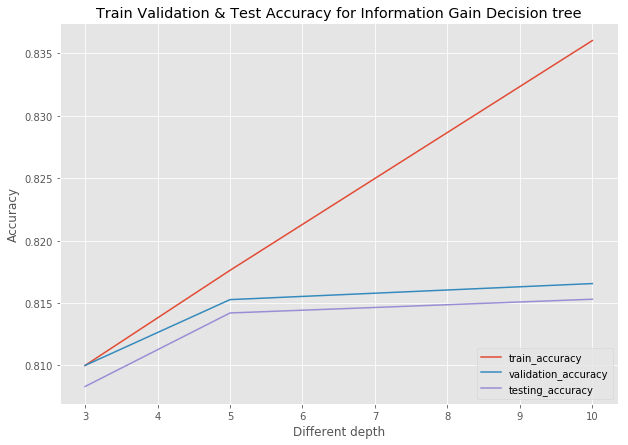

In [76]:
## Plotting the curves of training and test across different depths 
plt.figure()
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)

c=[3,5,10]
plt.figure(figsize=(10,7))
plt.title("Train Validation & Test Accuracy for Information Gain Decision tree")
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.xlabel('Different depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('Dataset1_TVT_GainDTree')

In [ ]:
# *****************************************GINI APPROACH**********************************************************#

In [61]:
# Classification Trees using GINI Index approach
gini_classifier = diff_dep(scaled_X_train, y_train, 3, False)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

print("\n ***************************************** \n")

gini_classifier = diff_dep(scaled_X_train, y_train, 5, False)
mean_train_acc20, mean_valid_acc20, test_acc20, res20 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc21, mean_valid_acc21, test_acc21, res21 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

print("\n ***************************************** \n")

gini_classifier = diff_dep(scaled_X_train, y_train, 10, False)
mean_train_acc30, mean_valid_acc30, test_acc30, res30 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc31, mean_valid_acc31, test_acc31, res31 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

Training results:

Accuracy Score: 0.8100

Confusion Matrix:
[[41726  4925]
 [11181 26936]]

Average Accuracy for Train data:	0.8100

Average Accuracy for Validation data :	0.8100


Test results:

Accuracy Score: 0.8083

Confusion Matrix:
[[18060  2177]
 [ 4787 11306]]


 ***************************************** 

Training results:

Accuracy Score: 0.8171

Confusion Matrix:
[[41071  5580]
 [ 9922 28195]]

Average Accuracy for Train data:	0.8179

Average Accuracy for Validation data :	0.8149


Test results:

Accuracy Score: 0.8133

Confusion Matrix:
[[17743  2494]
 [ 4288 11805]]


 ***************************************** 

Training results:

Accuracy Score: 0.8381

Confusion Matrix:
[[41114  5537]
 [ 8191 29926]]

Average Accuracy for Train data:	0.8401

Average Accuracy for Validation data :	0.8173


Test results:

Accuracy Score: 0.8145

Confusion Matrix:
[[17386  2851]
 [ 3890 12203]]



In [62]:
gini_model_acc = test_acc21
gini_res = res20

<Figure size 432x288 with 0 Axes>

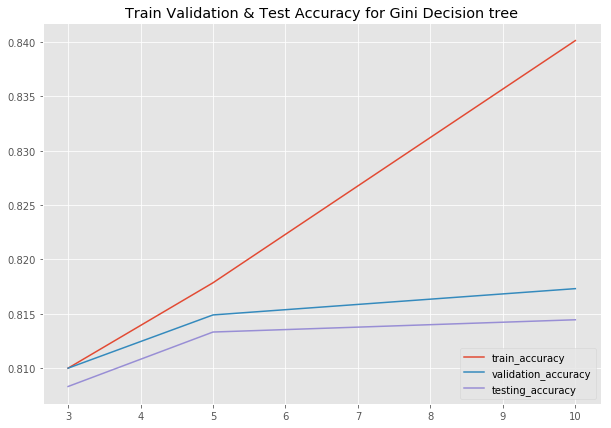

In [63]:
## Plotting the curves of training and test across different depths 
plt.figure()
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)

c=[3,5,10]
plt.figure(figsize=(10,7))
plt.title("Train Validation & Test Accuracy for Gini Decision tree")
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.legend(loc='lower right')

In [24]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = list(scaled_X_train), class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [ ]:
#*************************************************Ensemble Methods**************************************************************#

In [79]:
## Boosting algorith Implementation
from sklearn.ensemble import AdaBoostClassifier

C:\Users\avanm\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [73]:
# Ensemble methods
def depth_boost(X_train, y_train, depth):
    classifier = AdaBoostClassifier(n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=depth))
    classifier.fit(X_train,y_train)
    return classifier

In [80]:
## Adap BOOST 
boost_classifier = depth_boost(scaled_X_train, y_train, 3)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)
print("\n ****************************************************** \n")

boost_classifier = depth_boost(X_train, y_train, 5)
mean_train_acc20, mean_valid_acc20, test_acc20, res20 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc21, mean_valid_acc21, test_acc21, res21 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)
print("\n ****************************************************** \n")

boost_classifier = depth_boost(X_train, y_train, 10)
mean_train_acc30, mean_valid_acc30, test_acc30, res30 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc31, mean_valid_acc31, test_acc31, res31 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)


Training results:

Accuracy Score: 0.8294

Confusion Matrix:
[[40996  5655]
 [ 8805 29312]]

Average Accuracy for Train data:	0.8292

Average Accuracy for Validation data :	0.8243


Test results:

Accuracy Score: 0.8217

Confusion Matrix:
[[17640  2597]
 [ 3879 12214]]


 ****************************************************** 

Training results:

Accuracy Score: 0.5503

Confusion Matrix:
[[46651     0]
 [38117     0]]

Average Accuracy for Train data:	0.8455

Average Accuracy for Validation data :	0.8201


Test results:

Accuracy Score: 0.5570

Confusion Matrix:
[[20237     0]
 [16093     0]]


 ****************************************************** 

Training results:

Accuracy Score: 0.5568

Confusion Matrix:
[[46651     0]
 [37570   547]]

Average Accuracy for Train data:	0.9876

Average Accuracy for Validation data :	0.8140


Test results:

Accuracy Score: 0.5627

Confusion Matrix:
[[20236     1]
 [15885   208]]



In [81]:
boost_model_acc = test_acc21
boost_res = res20

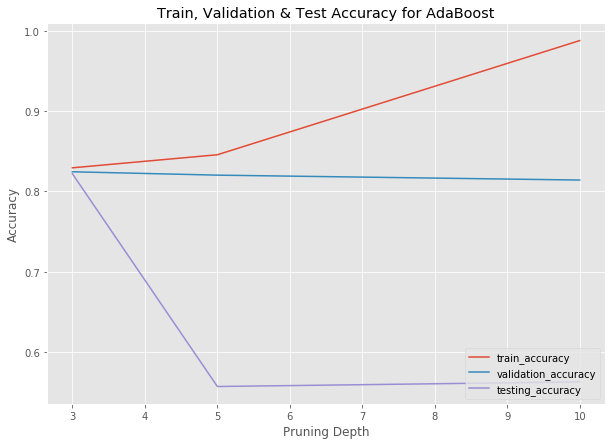

In [83]:
## Plotting the curves of training and test across different depths 

plt.figure(figsize=(10,7))
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)

c=[3,5,10]
plt.title("Train, Validation & Test Accuracy for AdaBoost")
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.xlabel('Pruning Depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('Dataset1_TVTAdaboost')

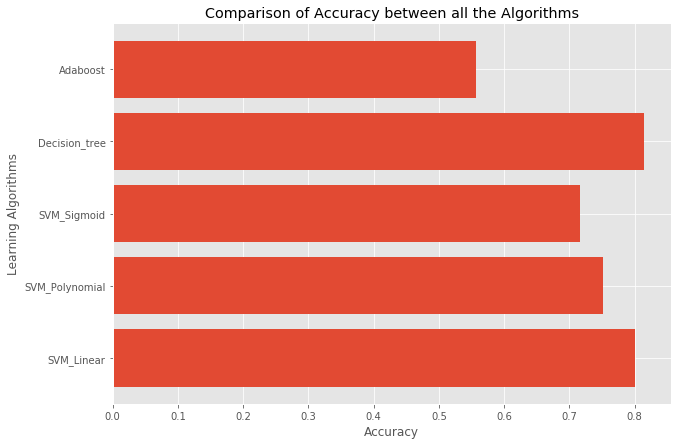

In [91]:
accuracy=[model1_acc,0.7513074593999449,0.716597853014038,if_model_acc,boost_model_acc]
Functions=['SVM_Linear','SVM_Polynomial','SVM_Sigmoid','Decision_tree','Adaboost']
plt.figure(figsize=(10,7))
plt.barh(Functions,accuracy,alpha=1)
plt.xlabel("Accuracy")
#plt.xlim([0.8,0.95])
plt.ylabel("Learning Algorithms")
plt.title("Comparison of Accuracy between all the Algorithms")
plt.savefig('dataset1_Comparison_of_Accuracy_between_all_the_Algorithms.png')

In [92]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

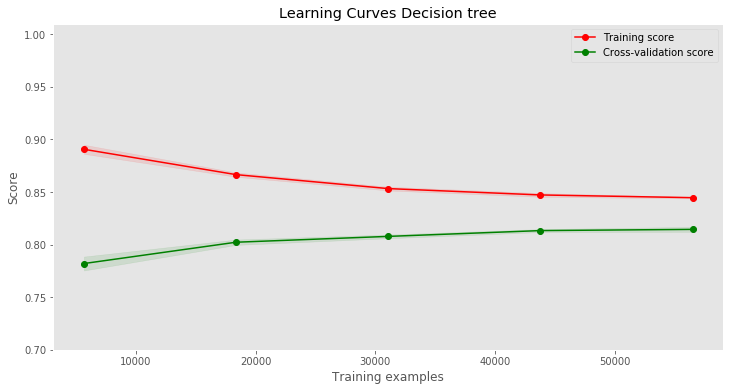

<Figure size 864x432 with 0 Axes>

In [95]:
title = r"Learning Curves Decision tree"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(test_size=0.2, random_state=0)
classifier = DecisionTreeClassifier(max_depth=10, random_state=22)
plot_learning_curve(classifier, title, X_train, y_train, (0.7, 1.01))
plt.show()
plt.savefig('Dataset1_learningCurve1.png')

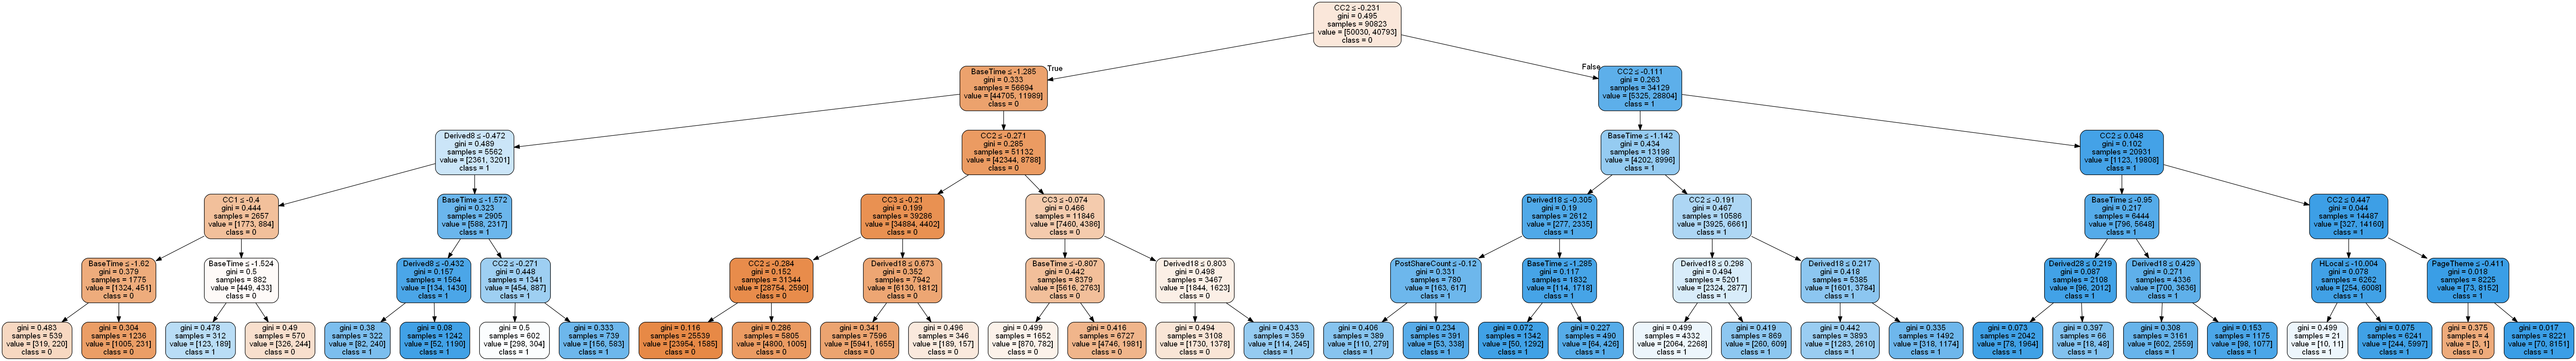

In [25]:
graph.write_png('Facebook_Tree.png')
Image(graph.create_png())

In [84]:
!pip install graphviz

You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [21]:
!pip install pydot

You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
